# EDA

In [1]:
import pandas as pd
import os
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
PATH_REPO_ROOT = Path().resolve().parent
PATH_DATA = PATH_REPO_ROOT / "data"
PATH_DATA_RAW = PATH_DATA / "raw"
PATH_DATA_RAW

PosixPath('/beegfs/.global0/ws/s4610340-energy_behavior/yahor/kaggle-predict_energy_behavior_of_prosumers/data/raw')

### Train df

In [3]:
df_train = pd.read_csv(PATH_DATA_RAW / "train.csv")
df_train["datetime"] = pd.to_datetime(df_train["datetime"]) 
df_train

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
2,0,0,2,0.000,0,2021-09-01 00:00:00,0,2,1
3,0,0,2,17.314,1,2021-09-01 00:00:00,0,3,1
4,0,0,3,2.904,0,2021-09-01 00:00:00,0,4,2
...,...,...,...,...,...,...,...,...,...
2018347,15,1,0,197.233,1,2023-05-31 23:00:00,637,2018347,64
2018348,15,1,1,0.000,0,2023-05-31 23:00:00,637,2018348,59
2018349,15,1,1,28.404,1,2023-05-31 23:00:00,637,2018349,59
2018350,15,1,3,0.000,0,2023-05-31 23:00:00,637,2018350,60


Number of unique series

In [4]:
df_train["prediction_unit_id"].unique().shape

(69,)

In [5]:
df_train["target"].describe()

count    2.017824e+06
mean     2.748556e+02
std      9.095024e+02
min      0.000000e+00
25%      3.780000e-01
50%      3.113300e+01
75%      1.802062e+02
max      1.548027e+04
Name: target, dtype: float64

Summary statistics by prediction_unit_id

In [6]:
df_train.groupby("prediction_unit_id")["target"].describe()

,count,mean,std,min,25%,50%,75%,max
prediction_unit_id,,,,,,,,
0,30616.0,332.743218,441.059505,0.0,1.51575,170.1000,481.03600,3445.013
1,30616.0,15.739827,17.962077,0.0,0.00100,9.5710,26.69500,113.911
2,30616.0,1044.438207,1361.709664,0.0,8.71500,597.9730,1575.56300,11255.665
3,30616.0,304.322249,461.935041,0.0,0.00000,134.5700,359.96500,2651.774
4,30616.0,485.525741,507.135691,0.0,0.00000,399.9530,853.39525,2318.481
...,...,...,...,...,...,...,...,...
64,26250.0,178.234803,218.582217,0.0,0.00225,122.0800,246.26175,1030.669
65,24762.0,32.736007,33.252590,0.0,0.02525,27.1400,58.62050,178.753
66,24762.0,66.124287,76.019317,0.0,0.00000,41.2560,112.32400,429.537


Take a look on single series

In [7]:
sample_unit_data = df_train.loc[(df_train["prediction_unit_id"] == 0)]
sample_unit_data

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
0,0,0,1,0.713,0,2021-09-01 00:00:00,0,0,0
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
122,0,0,1,1.132,0,2021-09-01 01:00:00,0,122,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
244,0,0,1,0.490,0,2021-09-01 02:00:00,0,244,0
...,...,...,...,...,...,...,...,...,...
2017963,0,0,1,569.301,1,2023-05-31 21:00:00,637,2017963,0
2018092,0,0,1,5.086,0,2023-05-31 22:00:00,637,2018092,0
2018093,0,0,1,577.499,1,2023-05-31 22:00:00,637,2018093,0
2018222,0,0,1,2.921,0,2023-05-31 23:00:00,637,2018222,0


In [8]:
sample_unit_data.loc[sample_unit_data["is_consumption"] == 1]

,county,is_business,product_type,target,is_consumption,datetime,data_block_id,row_id,prediction_unit_id
1,0,0,1,96.590,1,2021-09-01 00:00:00,0,1,0
123,0,0,1,77.691,1,2021-09-01 01:00:00,0,123,0
245,0,0,1,91.594,1,2021-09-01 02:00:00,0,245,0
367,0,0,1,87.955,1,2021-09-01 03:00:00,0,367,0
489,0,0,1,88.184,1,2021-09-01 04:00:00,0,489,0
...,...,...,...,...,...,...,...,...,...
2017703,0,0,1,300.096,1,2023-05-31 19:00:00,637,2017703,0
2017833,0,0,1,443.340,1,2023-05-31 20:00:00,637,2017833,0
2017963,0,0,1,569.301,1,2023-05-31 21:00:00,637,2017963,0
2018093,0,0,1,577.499,1,2023-05-31 22:00:00,637,2018093,0


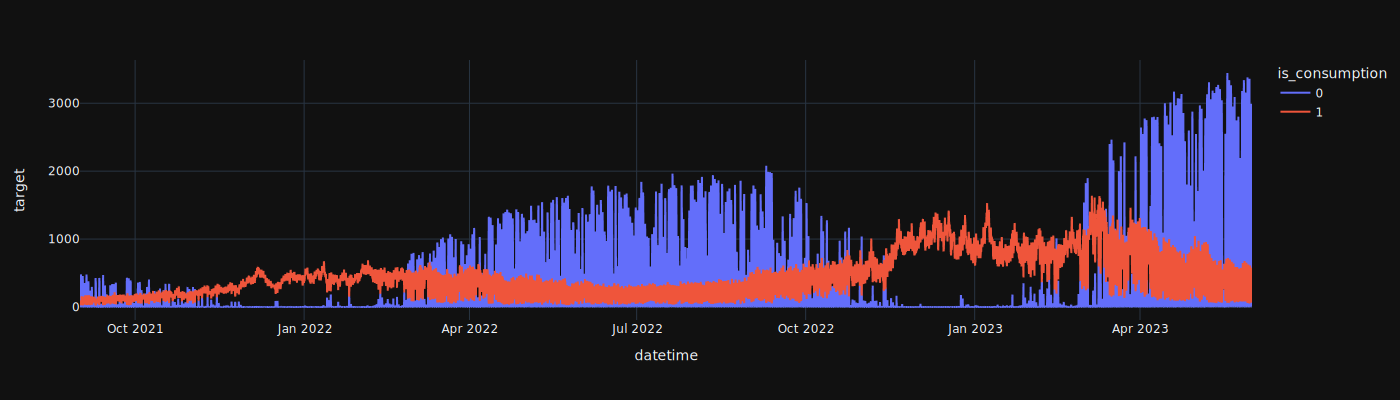

In [13]:
fig: go.Figure = px.line(sample_unit_data, x="datetime", y="target", color="is_consumption", width=1400, height=400)
fig.show(renderer="svg")